<a href="https://colab.research.google.com/github/Torikul385/ComputerVision/blob/main/Time_Series_Classification_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import keras
from keras import layers

In [2]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")


In [3]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))
print(classes)

[-1  1]


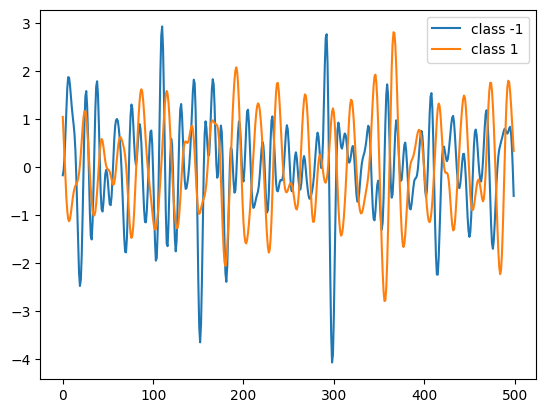

In [4]:
plt.figure()

for c in classes:
  c_x_train = x_train[y_train == c]
  plt.plot(c_x_train[3], label="class " + str(c))

plt.legend(loc='best')
plt.show()
plt.close()

In [5]:
x_train = np.reshape(x_train, [x_train.shape[0], x_train.shape[1], 1])

In [6]:
x_test = np.reshape(x_test, [x_test.shape[0], x_test.shape[1], 1])

In [7]:
num_classes = len(np.unique(y_train))
print(num_classes)

2


In [8]:
idx = np.random.permutation(len(x_train))

x_train = x_train[idx]
y_train = y_train[idx]


In [9]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [10]:
print(x_train.shape)
print(y_train.shape)

(3601, 500, 1)
(3601,)


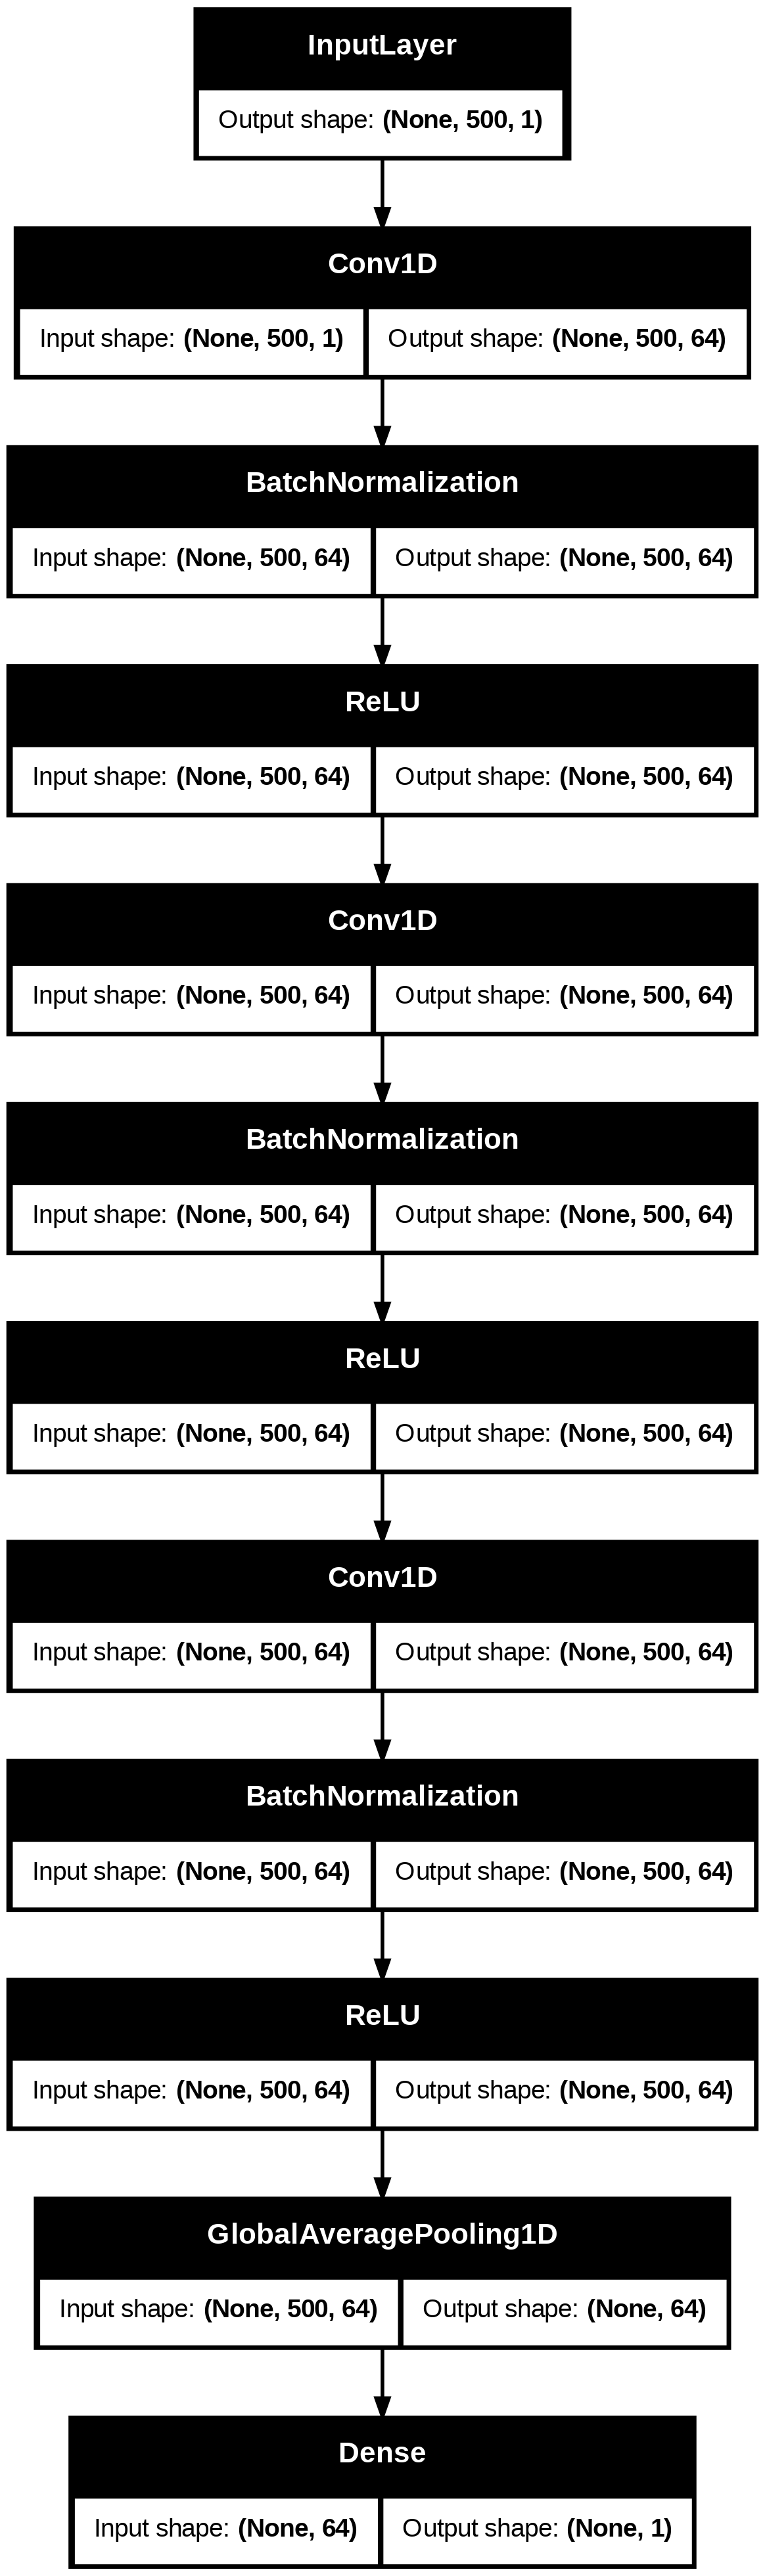

In [14]:
def make_model(input_shape):
  input_layer = keras.layers.Input(input_shape)
  x = input_layer

  for i in range(3):
    x = layers.Conv1D(filters=64, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

  x = layers.GlobalAveragePooling1D()(x)
  output = layers.Dense(1, activation='sigmoid')(x)

  return keras.models.Model(input_layer, output)

model = make_model(x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [15]:
epochs = 500

batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True, monitor='val_loss'),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=10, min_lr=1e-4, monitor='val_loss'),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1),
]

model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [16]:
history = model.fit(
    x_train,  y_train, batch_size=batch_size,
    epochs=epochs, callbacks=callbacks, validation_split=0.2, verbose=1
)

Epoch 1/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.6728 - loss: 0.6069 - val_accuracy: 0.5049 - val_loss: 0.7664 - learning_rate: 0.0010
Epoch 2/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.7739 - loss: 0.4829 - val_accuracy: 0.5049 - val_loss: 0.8447 - learning_rate: 0.0010
Epoch 3/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.7924 - loss: 0.4406 - val_accuracy: 0.5049 - val_loss: 0.7555 - learning_rate: 0.0010
Epoch 4/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.7690 - loss: 0.4487 - val_accuracy: 0.6893 - val_loss: 0.6414 - learning_rate: 0.0010
Epoch 5/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.8068 - loss: 0.4082 - val_accuracy: 0.7725 - val_loss: 0.5516 - learning_rate: 0.0010
Epoch 6/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - accuracy: 0.7911 - loss: 0.4166 - val_accuracy: 0.7268 - val_loss: 0.5869 - learning_rate: 0.0010
Epoch 7/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.7967 - los

KeyboardInterrupt: 

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy : ", test_acc)
print("Test Loss : ", test_loss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9225 - loss: 0.2050
Test Accuracy :  0.9204545617103577
Test Loss :  0.20541934669017792
